<a href="https://colab.research.google.com/github/Hilbert-HN/HN_Reinforcement_Learning_Projects/blob/master/Trading_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Install and Import Dependencies

In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

     |████████████████████████████████| 411.5 MB 7.4 kB/s 
     |████████████████████████████████| 412.3 MB 27 kB/s 
     |████████████████████████████████| 240 kB 43.6 MB/s 
     |████████████████████████████████| 171 kB 37.2 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
     |████████████████████████████████| 3.8 MB 34.2 MB/s 
     |████████████████████████████████| 503 kB 46.6 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=25e5e2ae08bf24a645d284446cd89a326e89a743d54e88dabf4646d7173403ef
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorb

In [ ]:
# Gym Stuff
import gym
import gym_anytrading

# stable baselines - RL
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


# 1. Bring Marketwatch GME Data

https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd '/content/drive/MyDrive/06-AI/Reinforcement_Learning/'

/content/drive/MyDrive/06-AI/Reinforcement_Learning


In [ ]:
%ls

'GME_20210225 to 20220225.csv'


In [ ]:
df=pd.read_csv('GME_20210225 to 20220225.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,02/25/2022,123.57,124.97,116.49,118.58,"1,694,150"
1,02/24/2022,105.53,125.71,104.12,124.58,"2,256,212"
2,02/23/2022,121.22,123.36,114.28,114.87,"1,348,252"
3,02/22/2022,118.20,123.33,114.19,118.06,"1,539,113"
4,02/18/2022,124.20,125.65,118.13,121.53,"1,553,539"


In [ ]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-02-25,123.57,124.97,116.49,118.58,"1,694,150"
2022-02-24,105.53,125.71,104.12,124.58,"2,256,212"
2022-02-23,121.22,123.36,114.28,114.87,"1,348,252"
2022-02-22,118.20,123.33,114.19,118.06,"1,539,113"
2022-02-18,124.20,125.65,118.13,121.53,"1,553,539"
...,...,...,...,...,...
2021-03-03,122.51,127.75,113.12,124.18,"19,273,881"
2021-03-02,116.93,133.20,112.20,118.18,"33,783,039"
2021-03-01,104.54,133.99,99.97,120.40,"49,793,969"


In [ ]:
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-02-25,123.57,124.97,116.49,118.58,"1,694,150"
2022-02-24,105.53,125.71,104.12,124.58,"2,256,212"
2022-02-23,121.22,123.36,114.28,114.87,"1,348,252"
2022-02-22,118.20,123.33,114.19,118.06,"1,539,113"
2022-02-18,124.20,125.65,118.13,121.53,"1,553,539"


In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size = 5)

In [ ]:
env.prices

array([118.58, 124.58, 114.87, 118.06, 121.53, 123.41, 128.33, 126.16,
       117.09, 124.25, 122.47, 124.29, 115.6 , 102.34, 102.34,  99.23,
       100.04, 112.6 , 108.93,  97.91,  93.52, 103.26,  99.79, 100.15,
       106.36, 102.67, 106.57, 108.91, 116.65, 122.48, 128.06, 130.3 ,
       131.15, 140.62, 131.03, 129.37, 148.91, 152.84, 148.39, 155.33,
       153.93, 146.46, 148.31, 152.14, 154.  , 158.12, 157.14, 155.64,
       144.59, 148.59, 147.69, 136.88, 159.01, 155.76, 173.65, 177.81,
       167.12, 172.39, 181.56, 179.84, 196.21, 202.01, 199.72, 211.78,
       213.9 , 247.55, 228.8 , 210.12, 210.  , 207.18, 209.14, 202.1 ,
       204.32, 199.19, 206.6 , 218.64, 213.25, 217.84, 218.33, 206.99,
       200.09, 183.51, 182.85, 173.51, 177.84, 173.97, 169.8 , 181.71,
       184.52, 186.79, 186.02, 183.28, 183.83, 184.06, 175.82, 178.1 ,
       172.68, 172.12, 171.07, 172.18])

In [ ]:
env.signal_features

array([[ 1.1858e+02,  0.0000e+00],
       [ 1.2458e+02,  6.0000e+00],
       [ 1.1487e+02, -9.7100e+00],
       [ 1.1806e+02,  3.1900e+00],
       [ 1.2153e+02,  3.4700e+00],
       [ 1.2341e+02,  1.8800e+00],
       [ 1.2833e+02,  4.9200e+00],
       [ 1.2616e+02, -2.1700e+00],
       [ 1.1709e+02, -9.0700e+00],
       [ 1.2425e+02,  7.1600e+00],
       [ 1.2247e+02, -1.7800e+00],
       [ 1.2429e+02,  1.8200e+00],
       [ 1.1560e+02, -8.6900e+00],
       [ 1.0234e+02, -1.3260e+01],
       [ 1.0234e+02,  0.0000e+00],
       [ 9.9230e+01, -3.1100e+00],
       [ 1.0004e+02,  8.1000e-01],
       [ 1.1260e+02,  1.2560e+01],
       [ 1.0893e+02, -3.6700e+00],
       [ 9.7910e+01, -1.1020e+01],
       [ 9.3520e+01, -4.3900e+00],
       [ 1.0326e+02,  9.7400e+00],
       [ 9.9790e+01, -3.4700e+00],
       [ 1.0015e+02,  3.6000e-01],
       [ 1.0636e+02,  6.2100e+00],
       [ 1.0267e+02, -3.6900e+00],
       [ 1.0657e+02,  3.9000e+00],
       [ 1.0891e+02,  2.3400e+00],
       [ 1.1665e+02,

# 2. Build Environment

In [ ]:
env.action_space

Discrete(2)

info {'total_reward': 29.129999999999924, 'total_profit': 0.8833491545777648, 'position': 1}


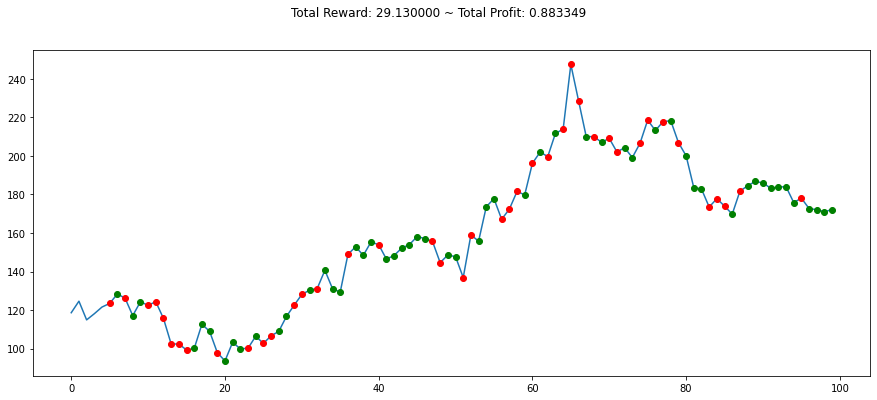

In [ ]:
state = env.reset()
while True:
  action = env.action_space.sample()
  n_state, reward, done, info = env.step(action)
  if done:
    print("info", info)
    break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 3. Build Environment and Train

In [ ]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,200), window_size = 5)
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose = 1)
model.learn(total_timesteps=100000)

---------------------------------
| explained_variance | 0.00525  |
| fps                | 8        |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 48.1     |
---------------------------------
---------------------------------
| explained_variance | 7.63e-06 |
| fps                | 228      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 48.7     |
---------------------------------
----------------------------------
| explained_variance | -9.86e-05 |
| fps                | 271       |
| nupdates           | 200       |
| policy_entropy     | 0.693     |
| total_timesteps    | 1000      |
| value_loss         | 36.6      |
----------------------------------
---------------------------------
| explained_variance | 0.000357 |
| fps                | 291      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| tota

# 4. Evaluation

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(190,240), window_size = 5)

obs= env.reset()
while True:
  obs = obs[np.newaxis,...]
  action,_states = model.predict(obs)
  obs, rewards, done, info = env.step(action)
  if done:
    print("info", info)
    break


info {'total_reward': -0.549999999999983, 'total_profit': 0.8730241537652087, 'position': 0}


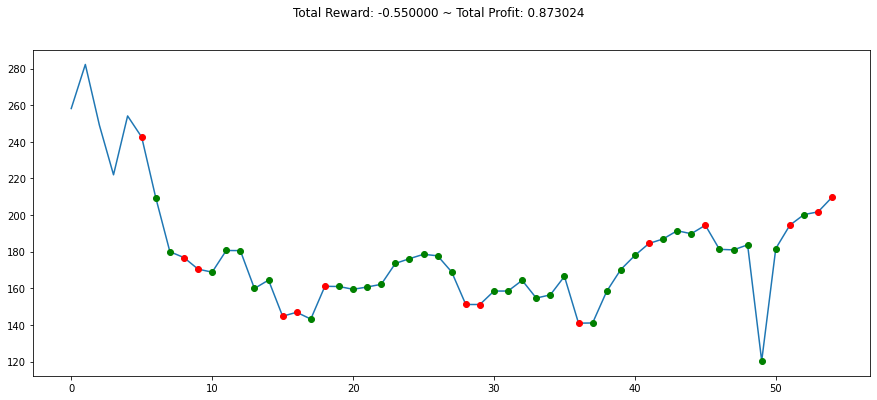

In [ ]:

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()